# Petrophysics Projects

RHOB prediction with 10 well loging data set

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns
import lasio

C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\3958080958.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DropDataVal.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\3958080958.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DropDataVal.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\3958080958.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

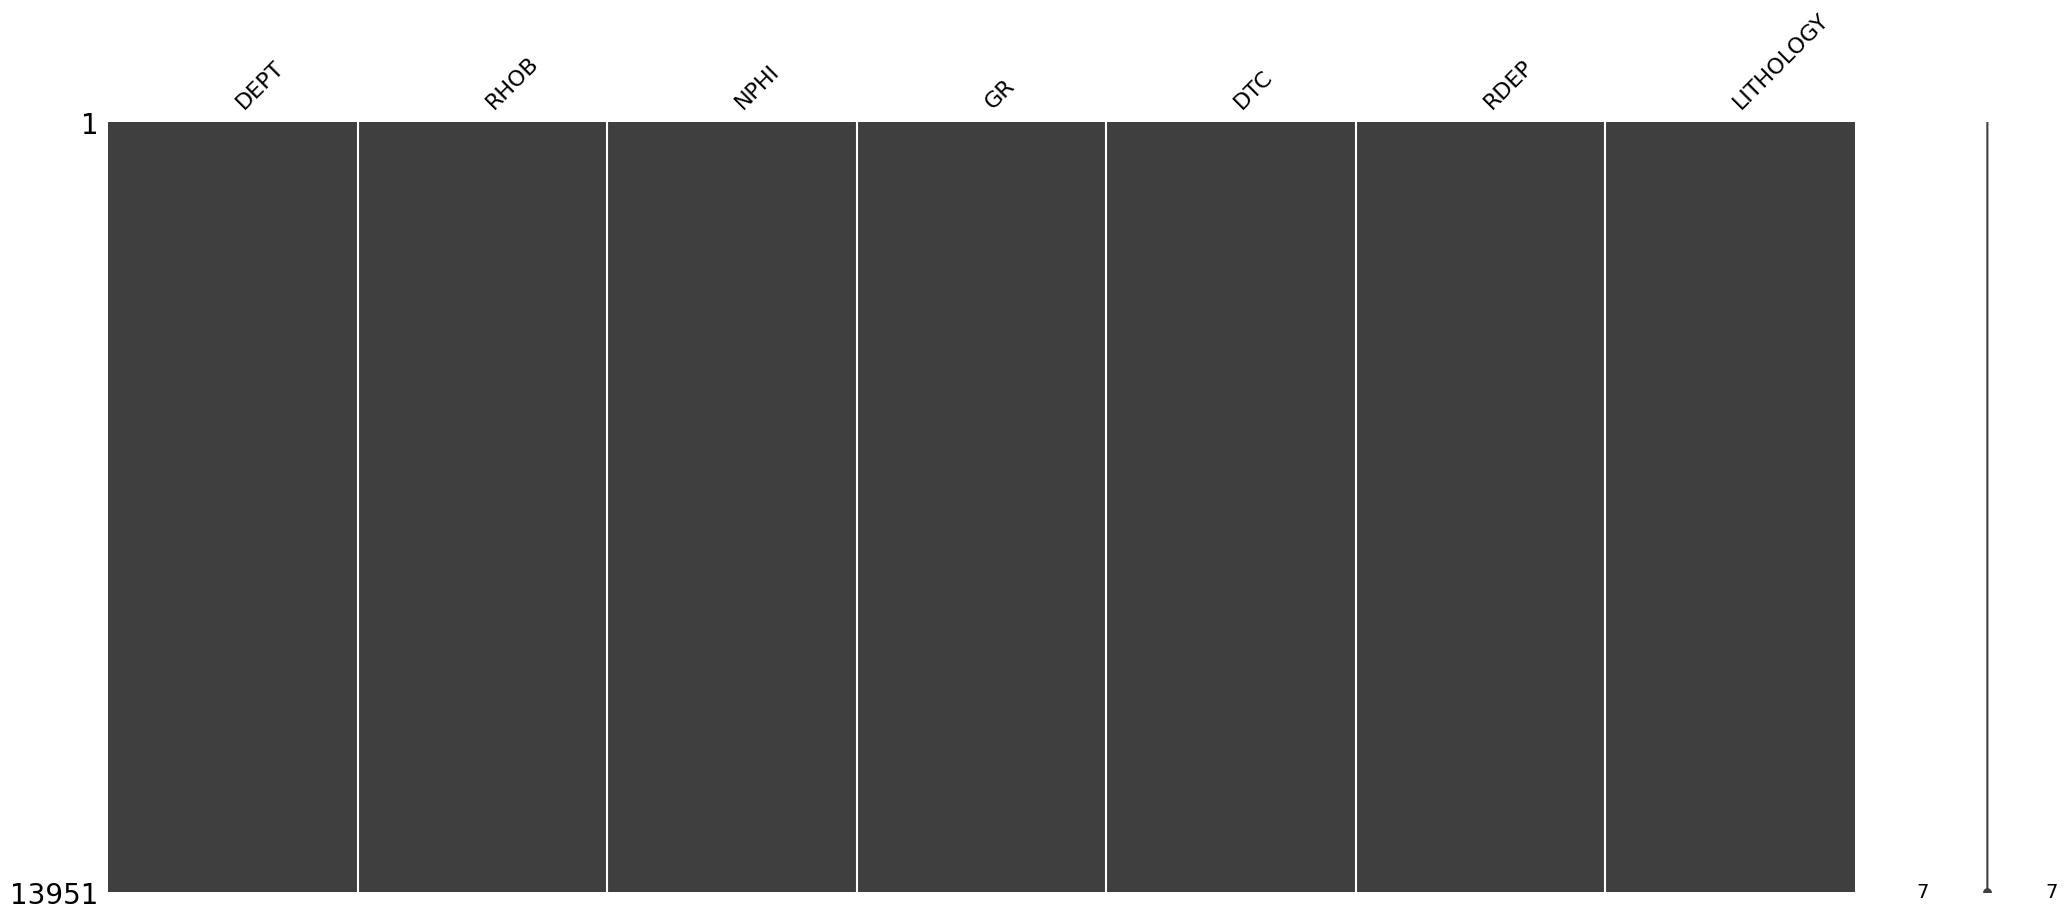

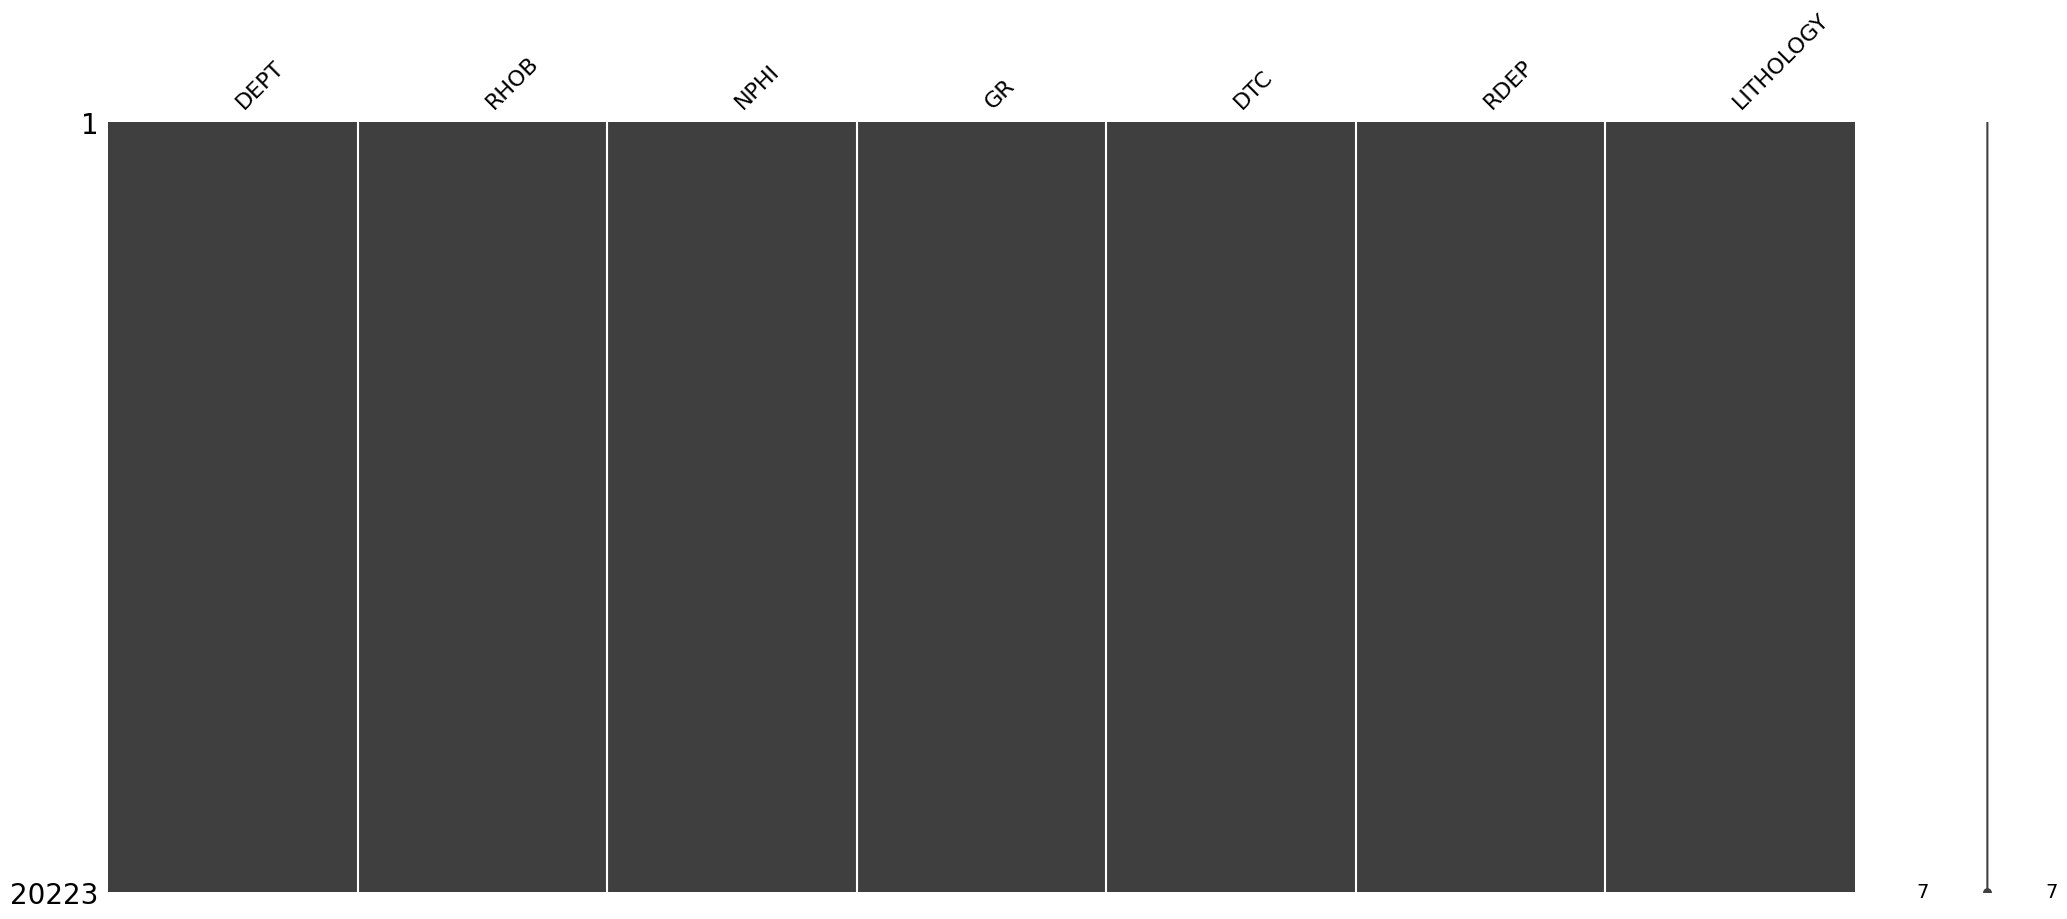

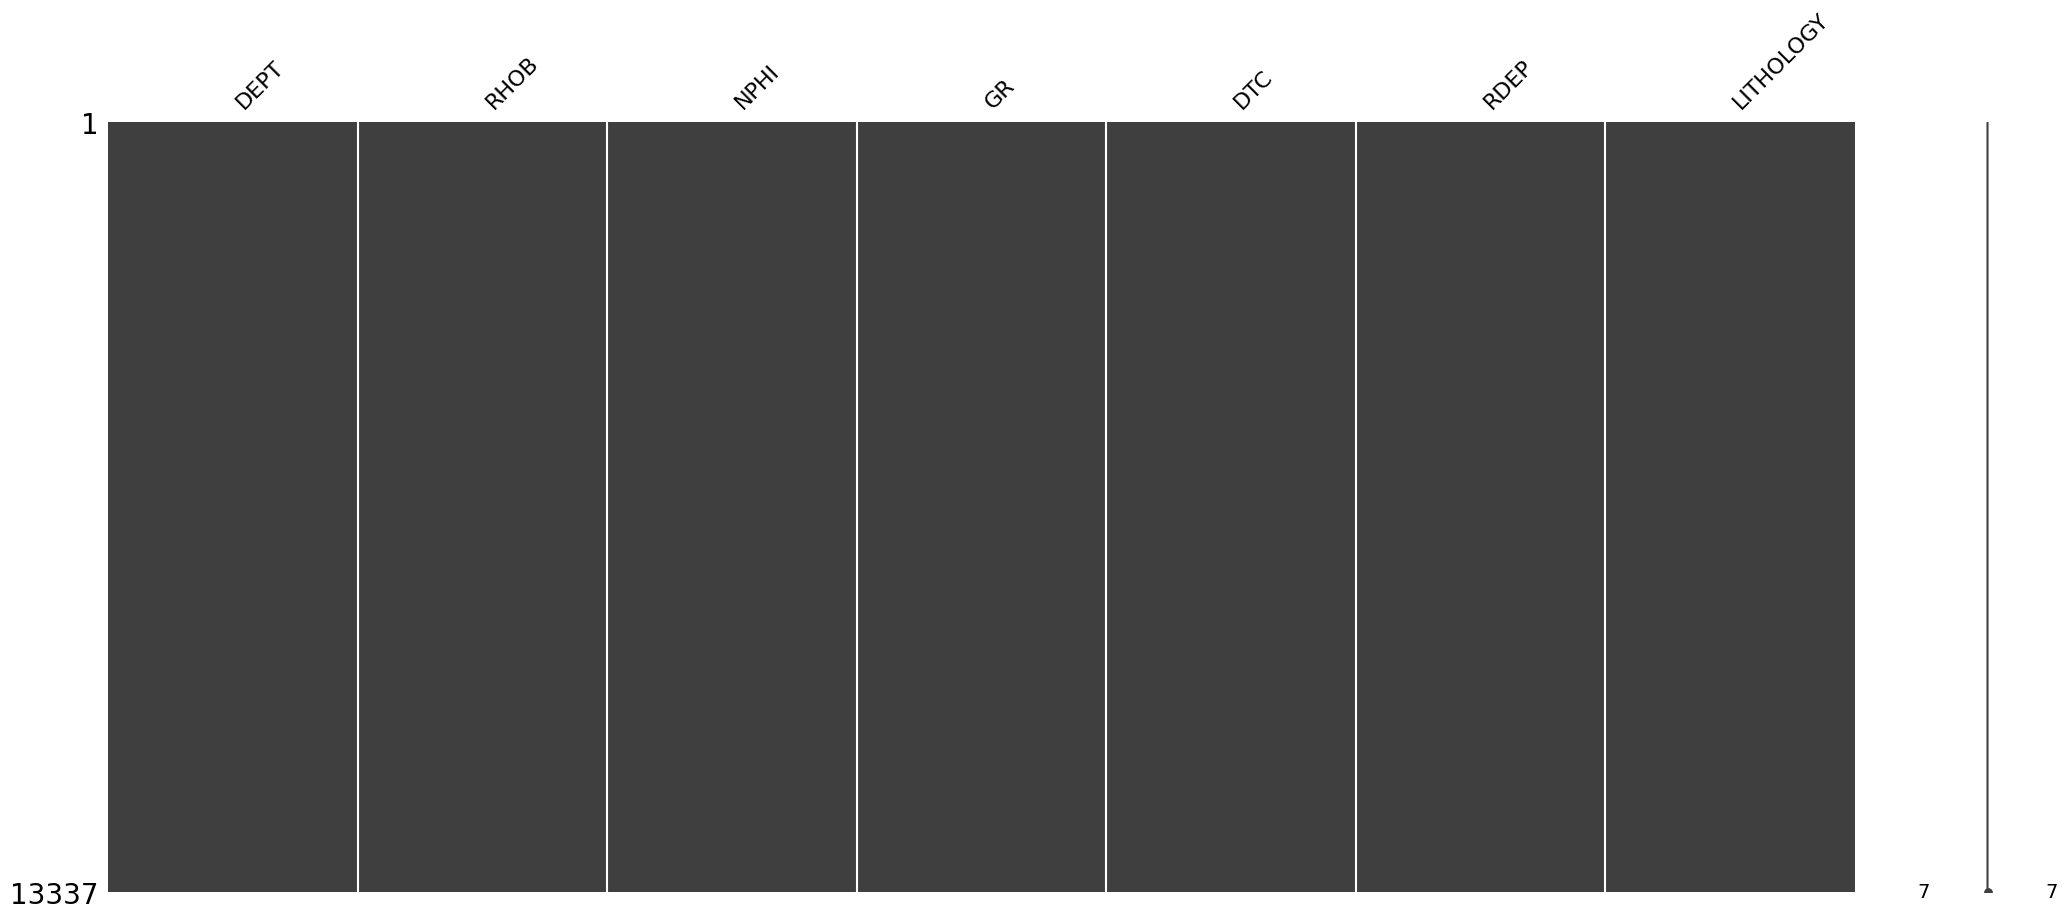

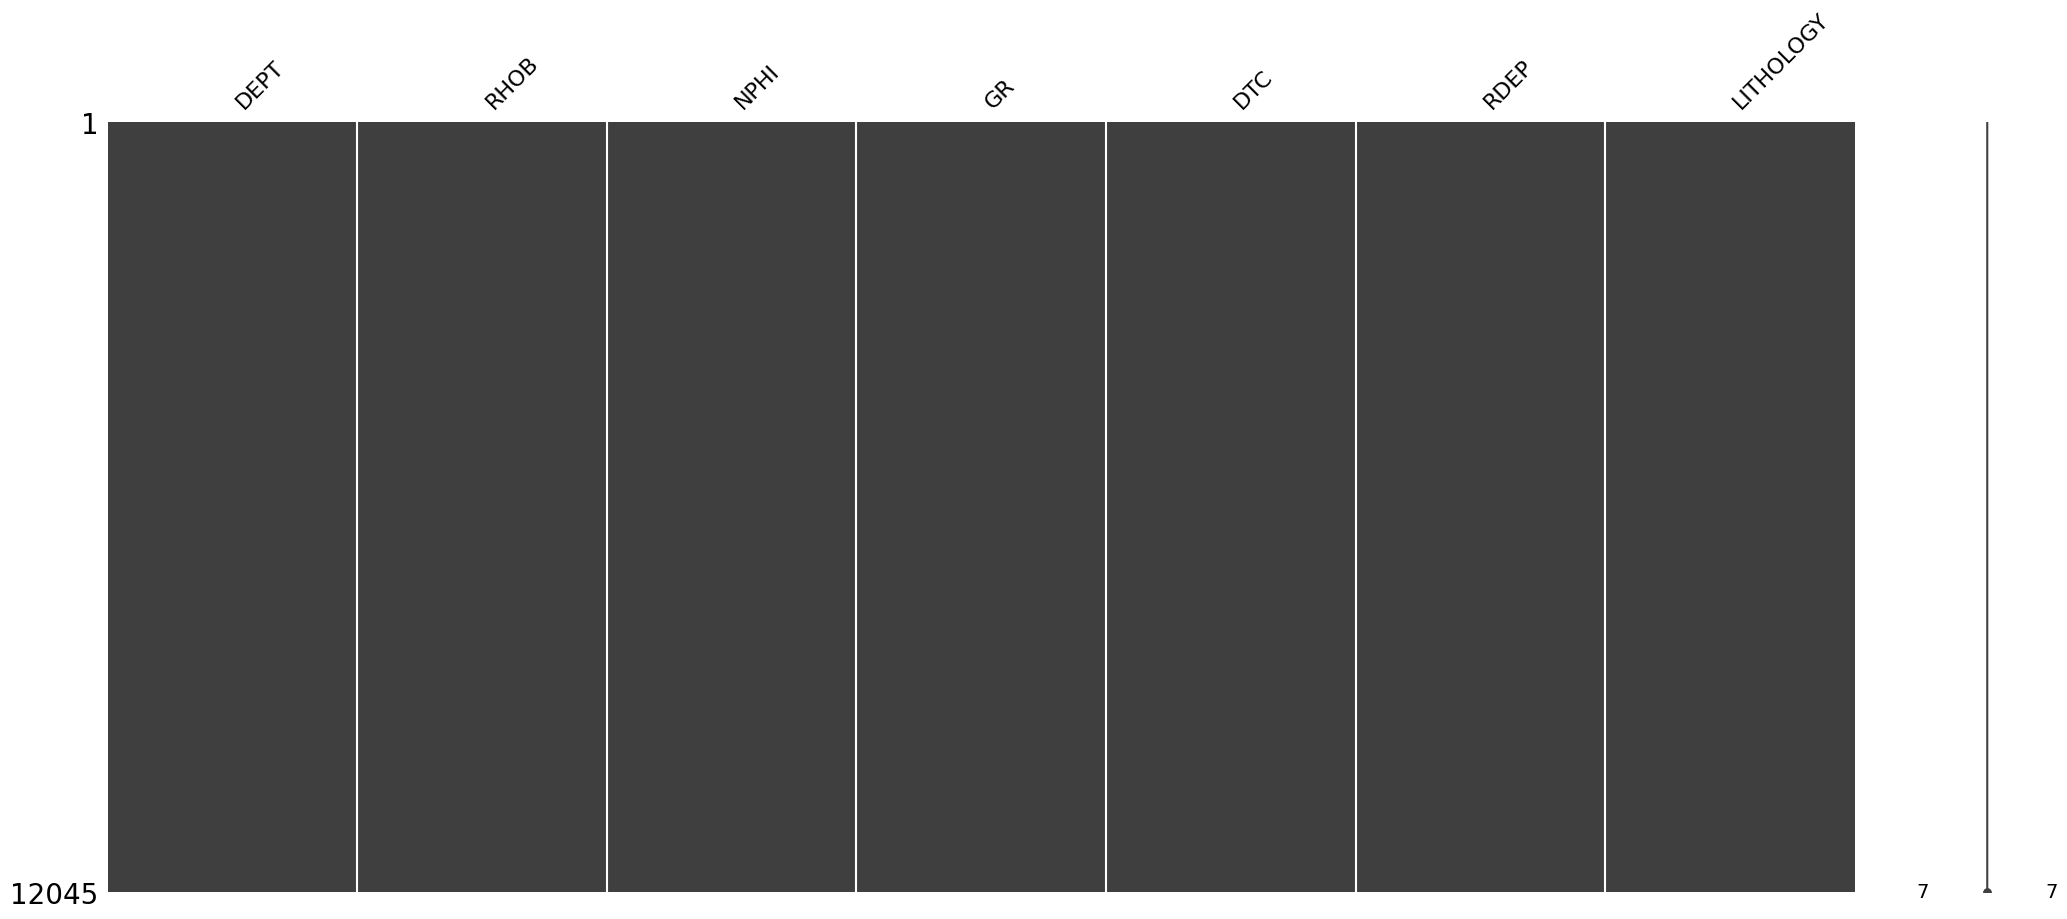

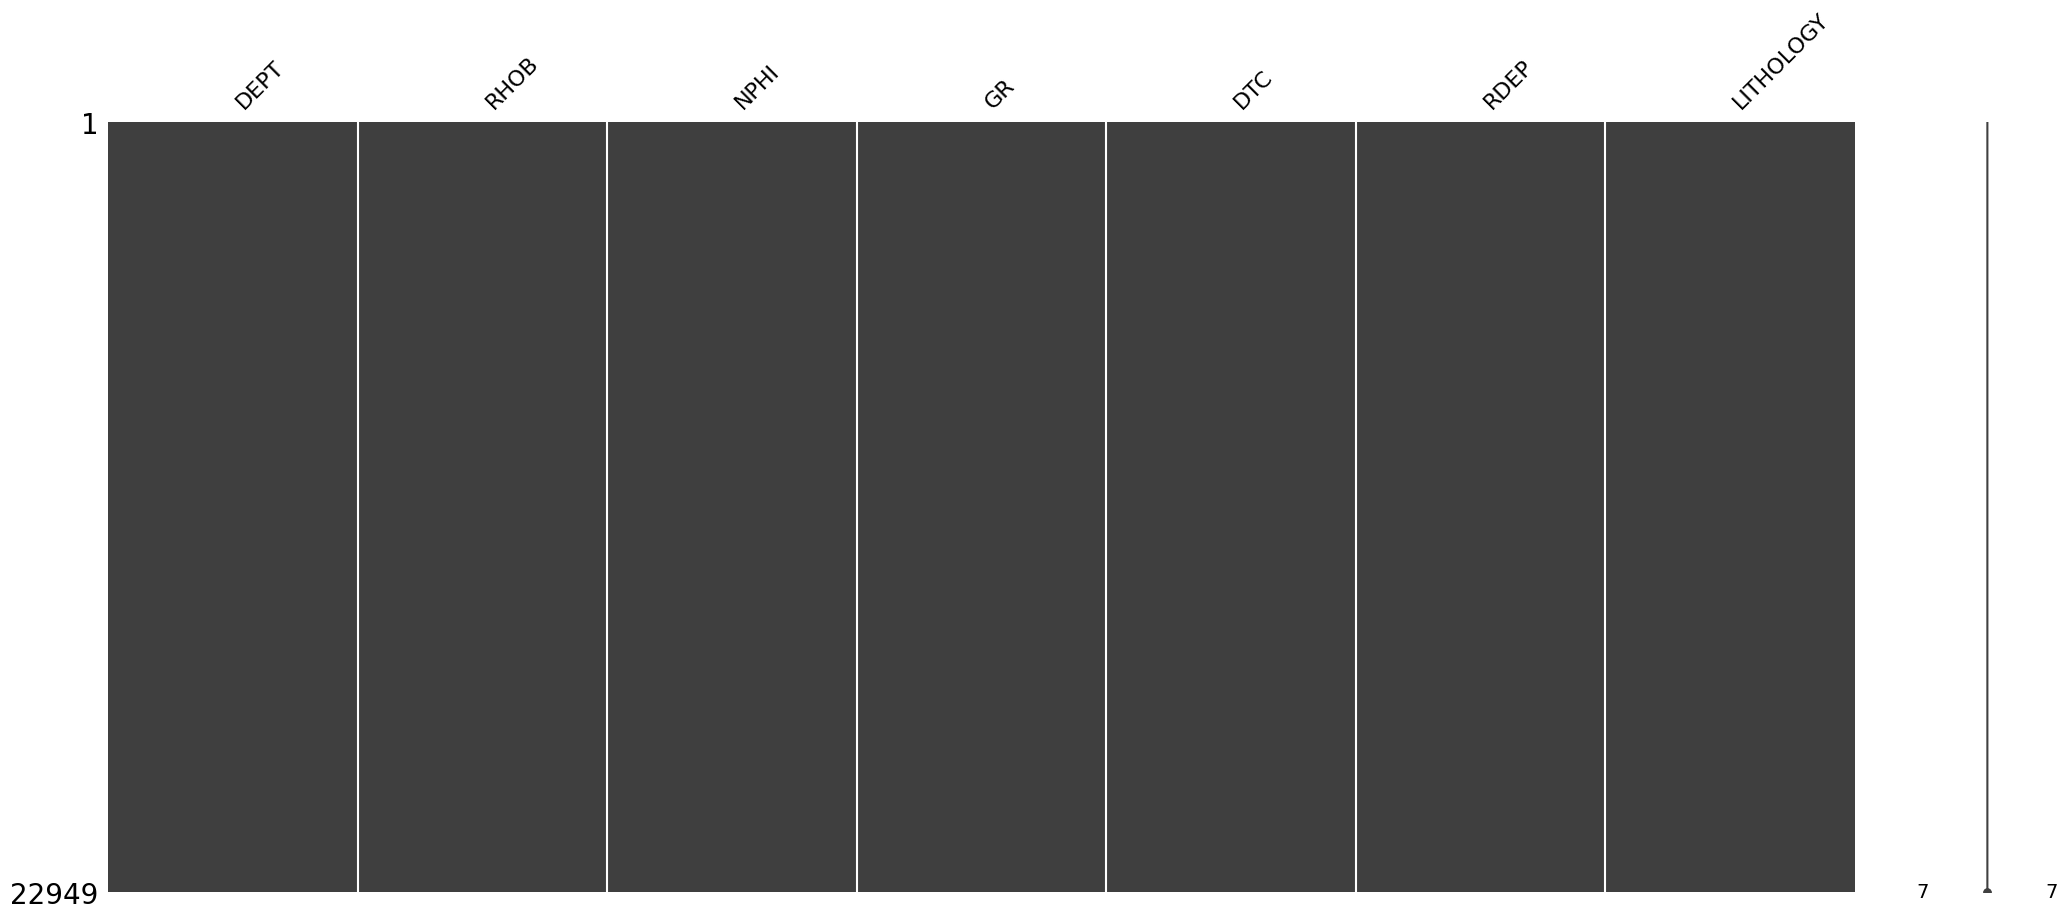

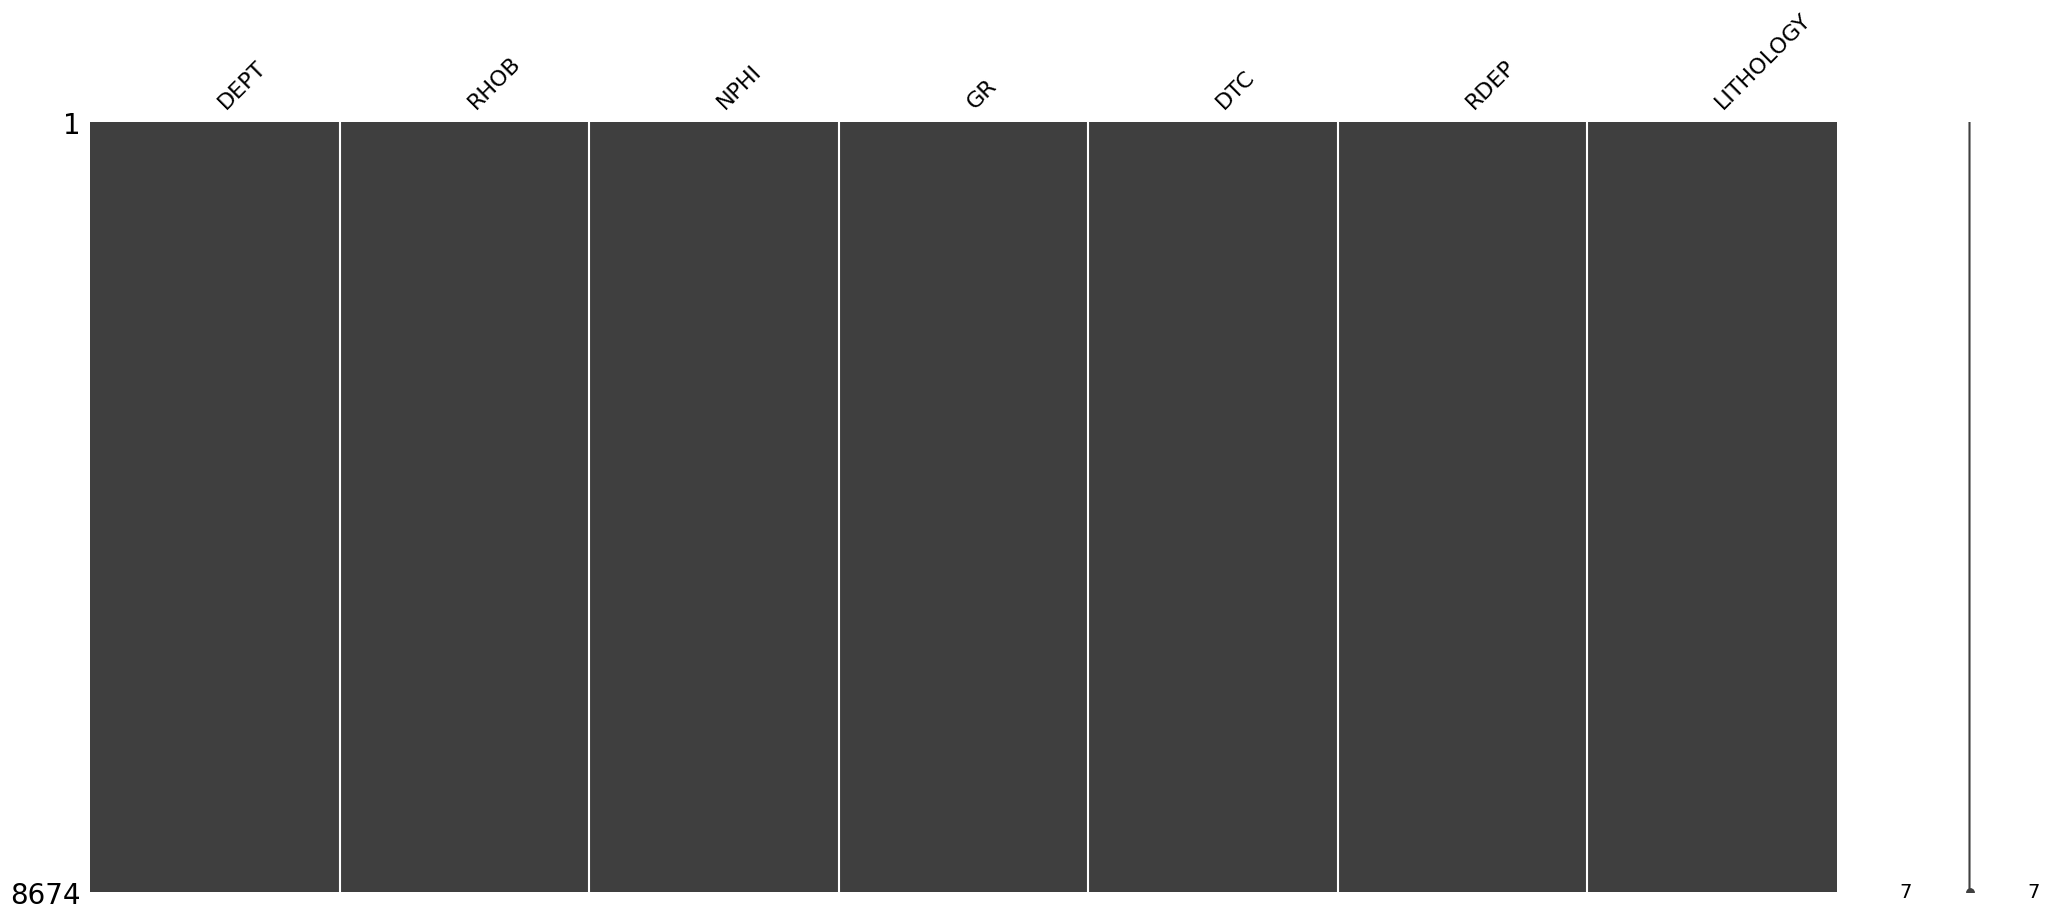

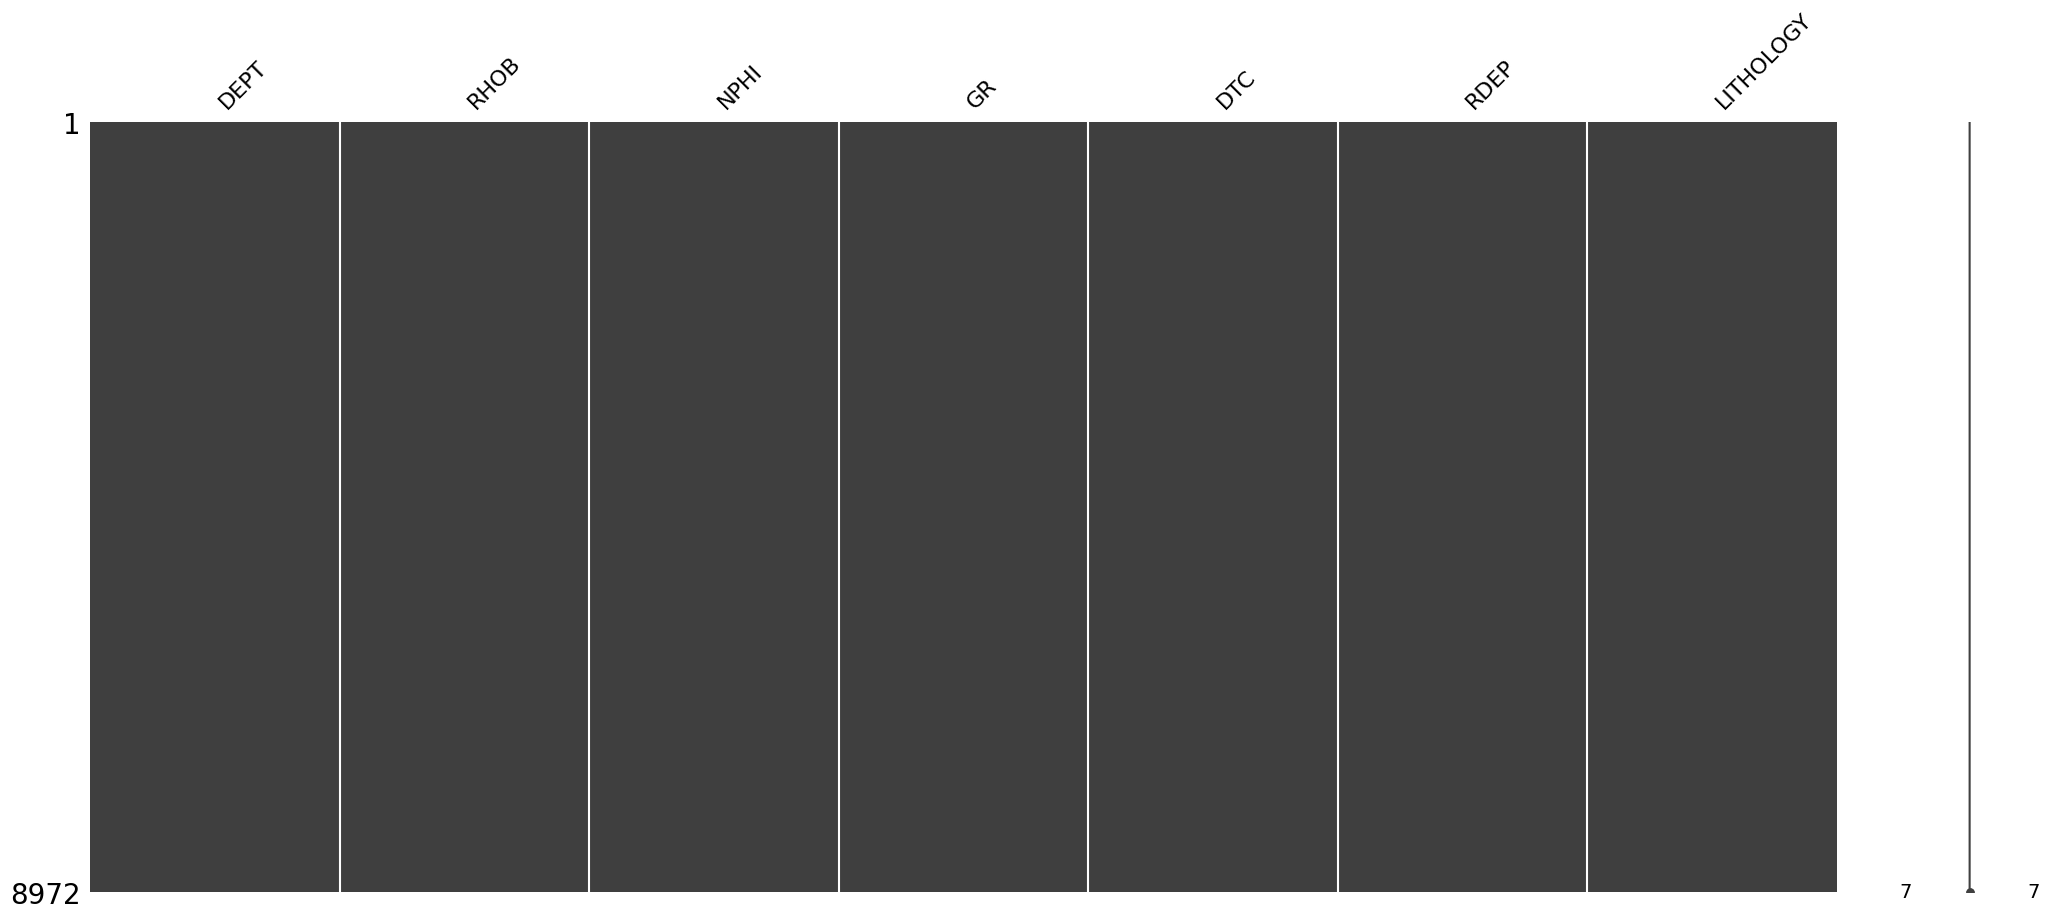

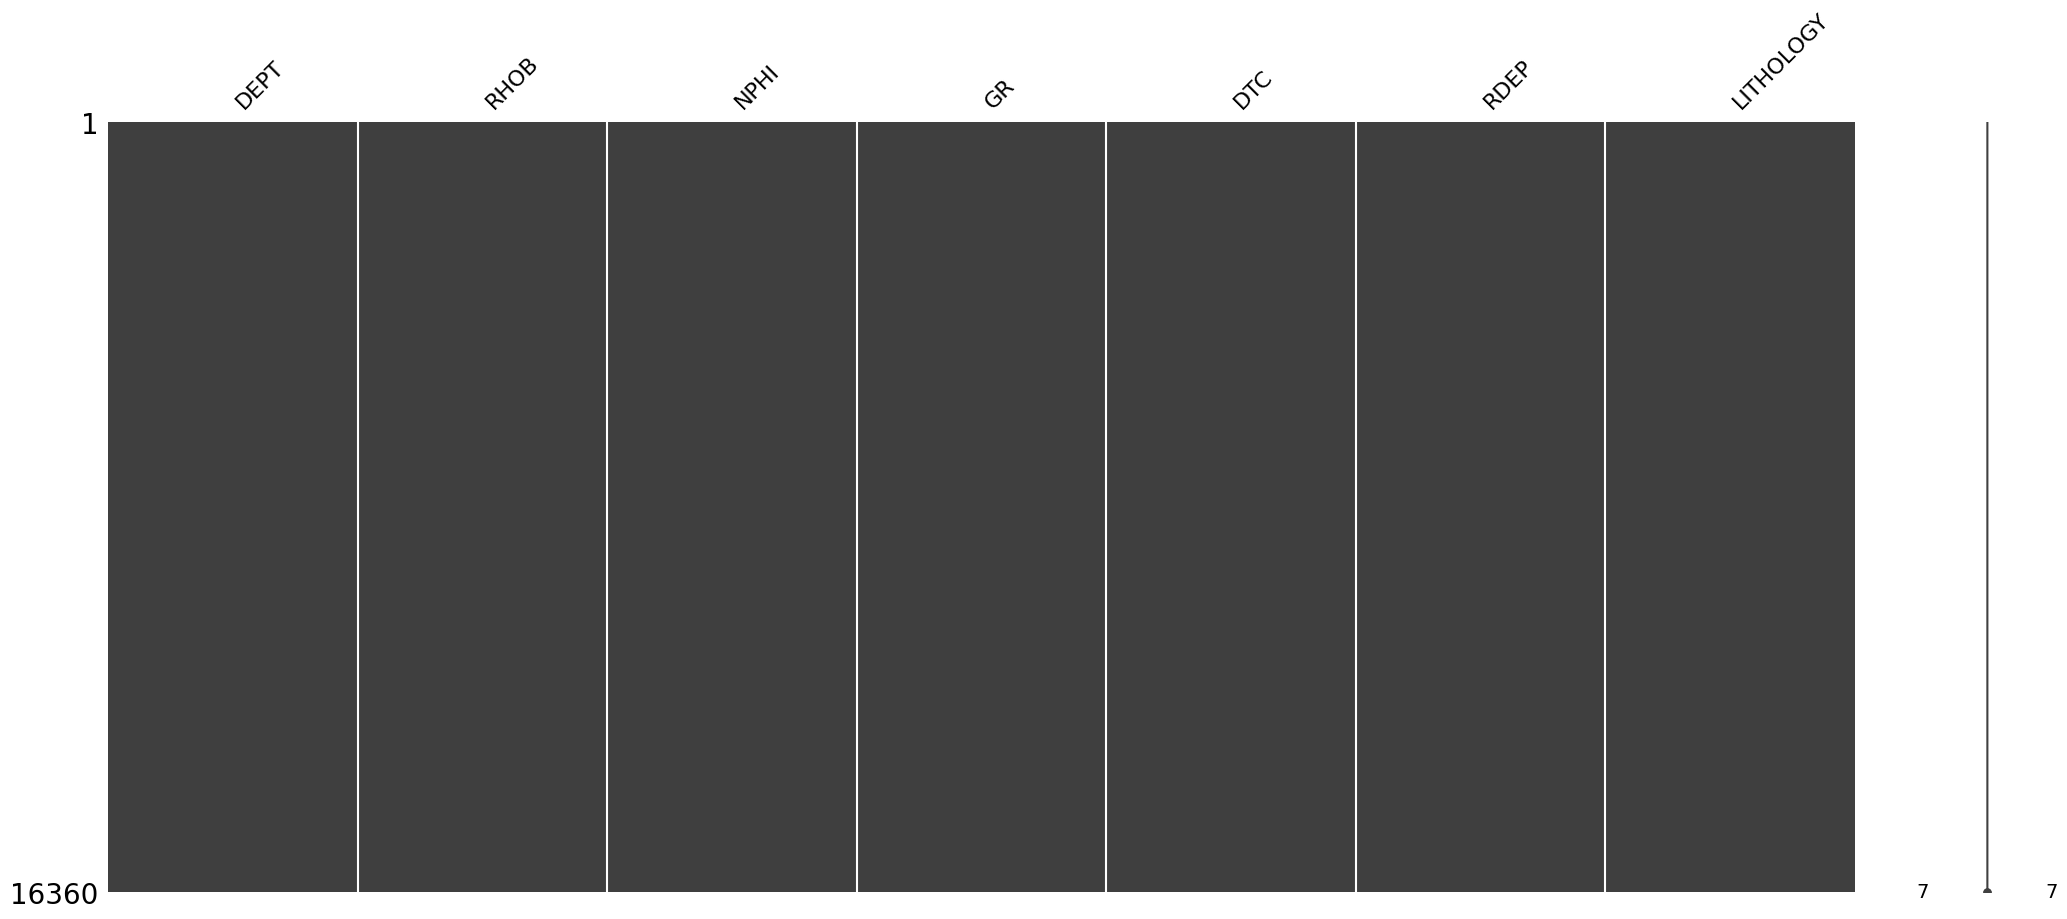

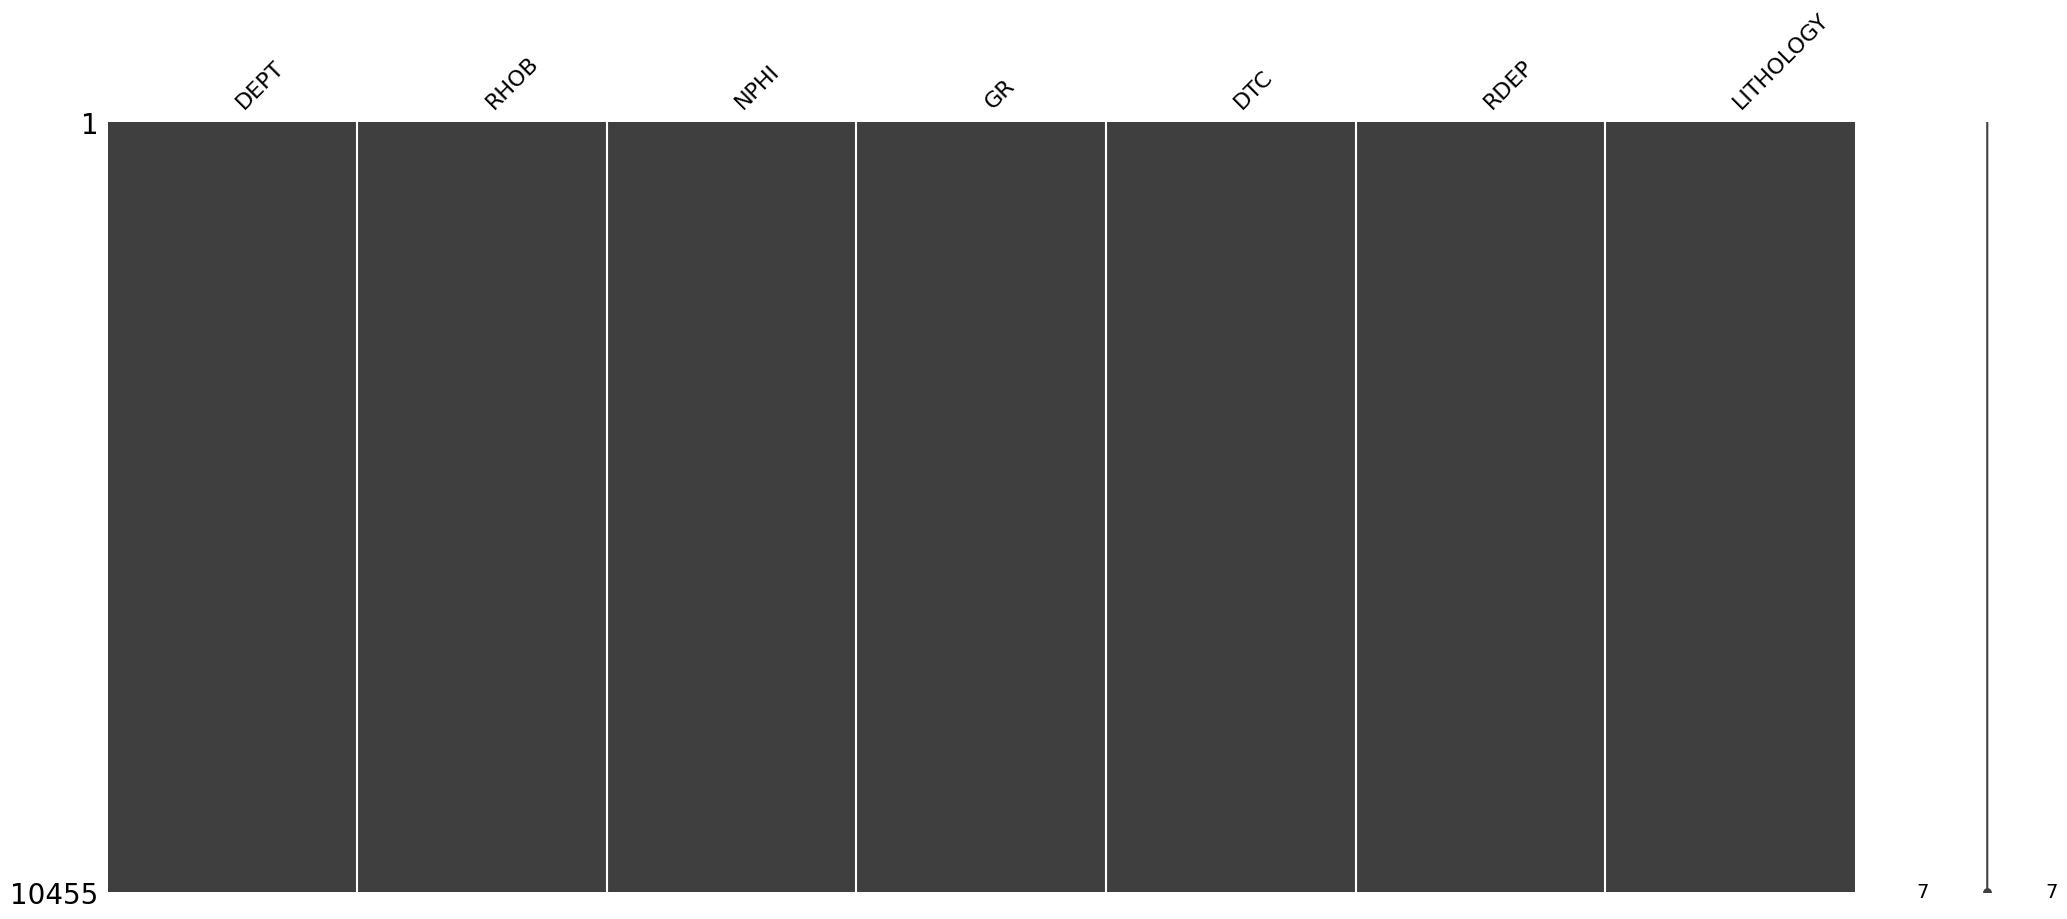

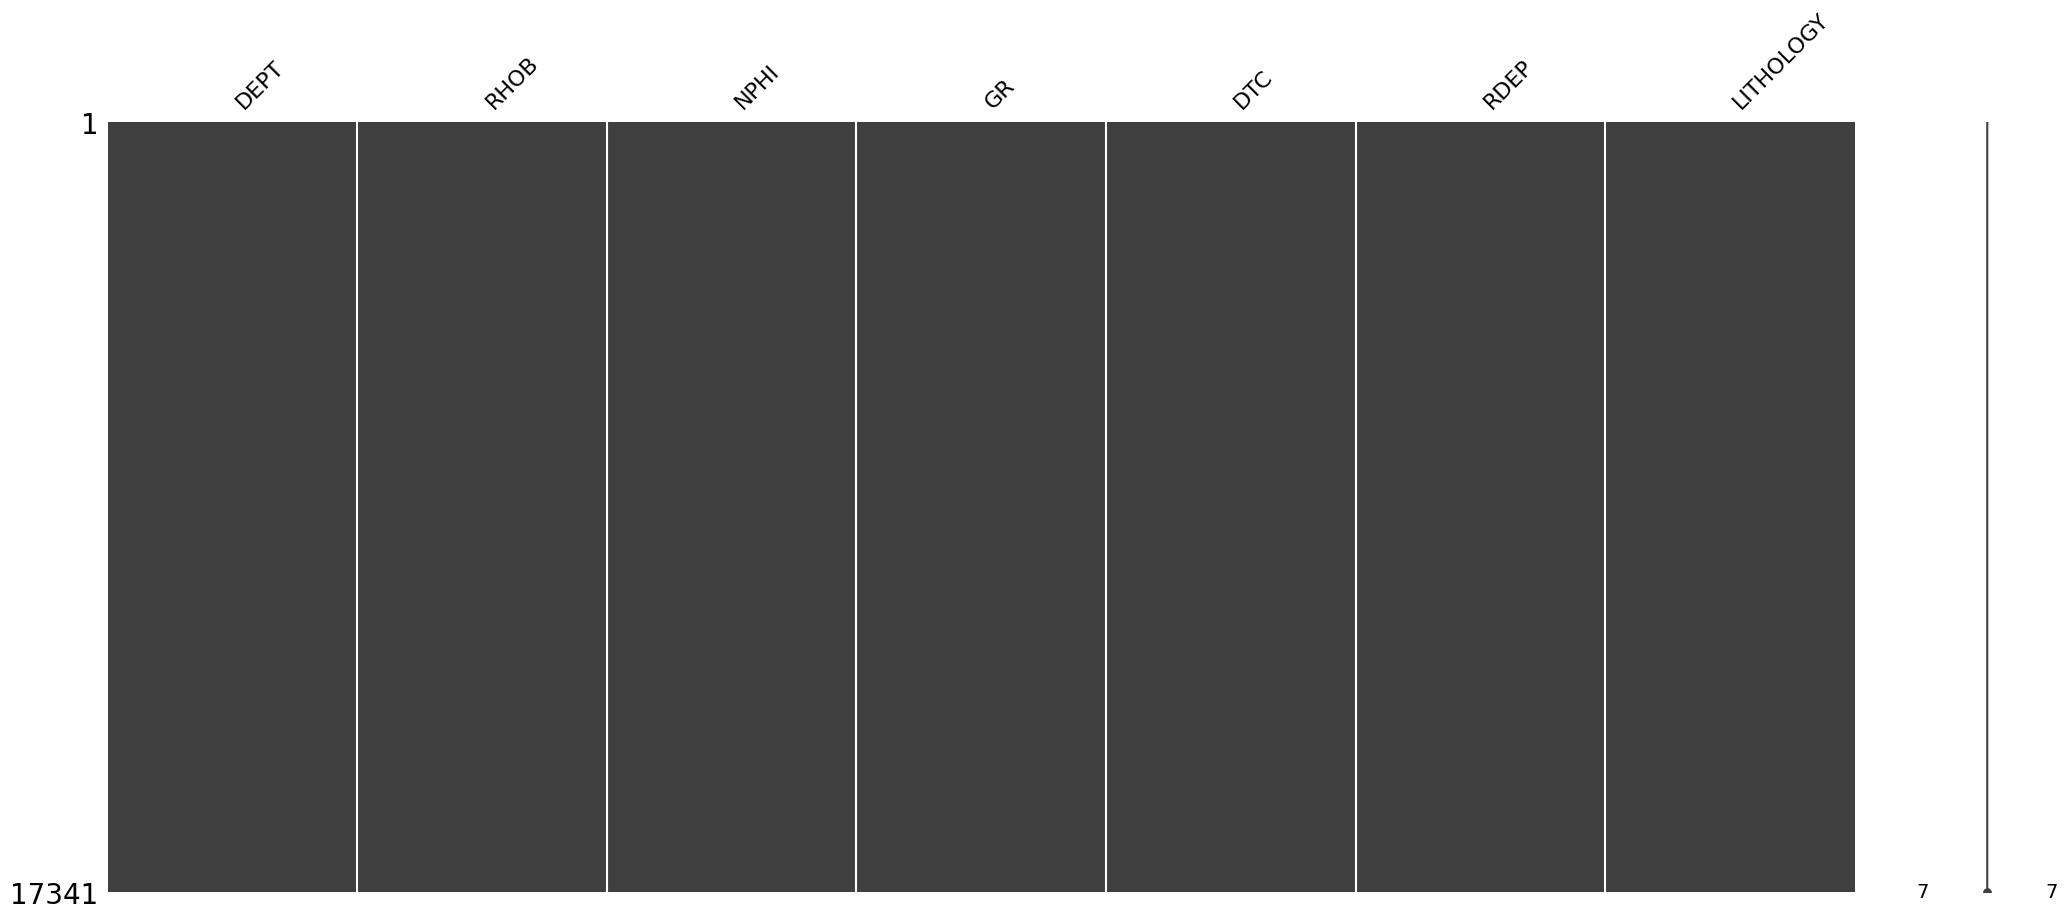

In [19]:
# Las reading path
las_paths = [
    "E:/DATALGS/15_9-13.las ",
    "E:/DATALGS/15_9-14.las ",
    "E:/DATALGS/15_9-15.las ",
    "E:/DATALGS/25_2-7.las ",
    "E:/DATALGS/25_4-5.las ",
    "E:/DATALGS/31_2-9.las ",
    "E:/DATALGS/31_2-10.las ",
    "E:/DATALGS/31_2-19 S.las ",
    "E:/DATALGS/31_3-2.las ",
    "E:/DATALGS/33_9-17.las "    
]

# selected important variable
selected_cols = ['DEPT', 'RHOB', 'NPHI', 'GR', 'DTC', 'RDEP','FORCE_2020_LITHOFACIES_LITHOLOGY']

for read_data in las_paths:
    las = lasio.read(read_data)
    dataframe = las.df()
    dataframe = dataframe.reset_index()
    selected_dataframe = dataframe[selected_cols]
    DropDataVal = selected_dataframe.dropna()
    # Rename the column of FORCE_2020_LITHOFACIES_LITHOLOGY into LITHOLOGY 
    DropDataVal.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)
    msno.matrix(DropDataVal)

cleaning data unsing Isolation Forest model to describe the inliers and outliers data

In [20]:
from sklearn.ensemble import IsolationForest 
anomaly_inputs = ['DEPT', 'RHOB', 'NPHI', 'GR', 'DTC', 'RDEP','LITHOLOGY']

model = IsolationForest(contamination=0.3, random_state=42, n_estimators=100) 
model.fit(DropDataVal[anomaly_inputs])

DropDataVal['anomaly_scores'] = model.decision_function(DropDataVal[anomaly_inputs])
DropDataVal['anomaly'] = model.predict(DropDataVal[anomaly_inputs])

c:\Users\Firza Rizaldi\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\1045624210.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DropDataVal['anomaly_scores'] = model.decision_function(DropDataVal[anomaly_inputs])
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\1045624210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DropDa

In [21]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 5202
Number of non anomalous values  12139
Total Number of Values: 17341


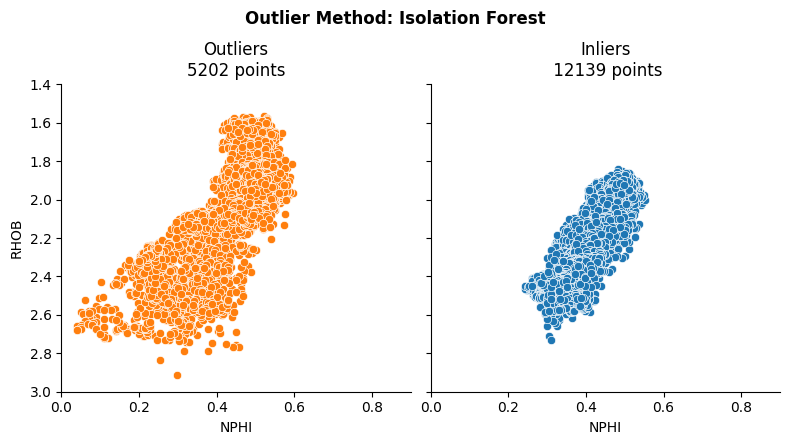

In [22]:
outlier_plot(DropDataVal, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.9], [3, 1.4]);

In [23]:

inliers = DropDataVal[DropDataVal['anomaly'] == 1]
inliers

,DEPT,RHOB,NPHI,GR,DTC,RDEP,LITHOLOGY,anomaly_scores,anomaly
2174,585.057985,2.131045,0.400000,65.843994,154.328354,2.349588,65000.0,0.001708,1
2175,585.209985,2.142010,0.393595,65.832100,153.515686,2.352457,65000.0,0.005479,1
2176,585.361985,2.152570,0.402757,65.961174,153.427567,2.355423,65000.0,0.006632,1
2177,585.513985,2.153378,0.397296,65.790489,153.627029,2.351140,65000.0,0.004150,1
2183,586.425985,2.128069,0.402386,67.893684,155.269043,2.270321,65000.0,0.003672,1
...,...,...,...,...,...,...,...,...,...
18761,3106.281985,2.361879,0.327852,113.505173,99.016945,1.513871,65000.0,0.005551,1
18762,3106.433985,2.385503,0.303692,82.748161,98.892166,1.494129,65000.0,0.037973,1
18895,3126.649985,2.454851,0.352232,92.473396,103.422325,2.331930,65000.0,0.026327,1
18896,3126.801985,2.379145,0.302345,67.154892,101.793808,1.839828,65000.0,0.016335,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import numpy

 XGBoost was a model that needs more variable to predict the RHOB, so we need more variable

In [25]:
# adding variable
VP = np.sqrt(43.3/(inliers['DTC']))
PORO = (2.65 -(inliers['RHOB']))/(2.65-1)
inliers['VP'] = VP
inliers['PORO'] = PORO

C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\4104246227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inliers['VP'] = VP
C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\4104246227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inliers['PORO'] = PORO


training and prediction data set

In [26]:
data = inliers[['DEPT', 'NPHI','RDEP', 'GR', 'DTC','PORO', 'VP','LITHOLOGY','RHOB']]
X = data.iloc[:, 1 : 7].values
Y = data['RHOB'].values

In [27]:
X_train = data.iloc[:,1:7].values
X_test  =data.iloc[:,1:7].values


In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
model = GradientBoostingRegressor()
model.fit( X_train, Y)

GradientBoostingRegressor()

In [30]:
X_test = X_train

In [31]:
y_pred = model.predict(X_test)
y_pred.shape

(12139,)

calculated RMSE after the prediction

In [32]:
mse = mean_squared_error(Y, y_pred)
rmse = math.sqrt(mse)*100
print(f"Root Mean Squared Error: {rmse:.2f}%")

Root Mean Squared Error: 0.12%


In [33]:
color_map = {
    30000: "#ffff00",  # Yellow
    65030: "#ffffe0",  # LightYellow
    65000: "#008b8b",  # DarkCyan
    70032: "#6a5acd",  # SlateBlue
    70000: "#6a5acd",  # SlateBlue
    80000: "#00bfff",  # DeepSkyBlue
    74000: "#00ffff",  # Cyan
    90000: "#000000",  # Black
    99000: "#ff6347",  # Tomato
    70032: "#ffc0cb",  # Pink
    86000: "#ffb6c1",  # Light Magenta
    93000: "#fa8072",  # Salmon
}


lithology_labels = {
    30000: 'Sandstone ',
    65030: 'Silty Sand',
    65000: 'Shale',
    70032: 'Chalk',
    70000: 'Limestone',
    80000: 'Marlstone',
    74000: 'Dolomite',
    90000: 'Coal',
    99000: ' Tuff',
    70032: 'Halite',
    86000: 'Anhydrite',
    93000: 'Basement',
}

Data set and Data Prediction Visualization

[2.1303829  2.14204839 2.15494553 ... 2.45461206 2.37848751 2.51900317]
['DEPT', 'NPHI', 'RDEP', 'GR', 'DTC', 'PORO', 'VP', 'LITHOLOGY', 'RHOB']


C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_16284\2758410731.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=list(reversed(range(len(color_map)))), aspect=60, pad=0.05, extend='neither', orientation='vertical')


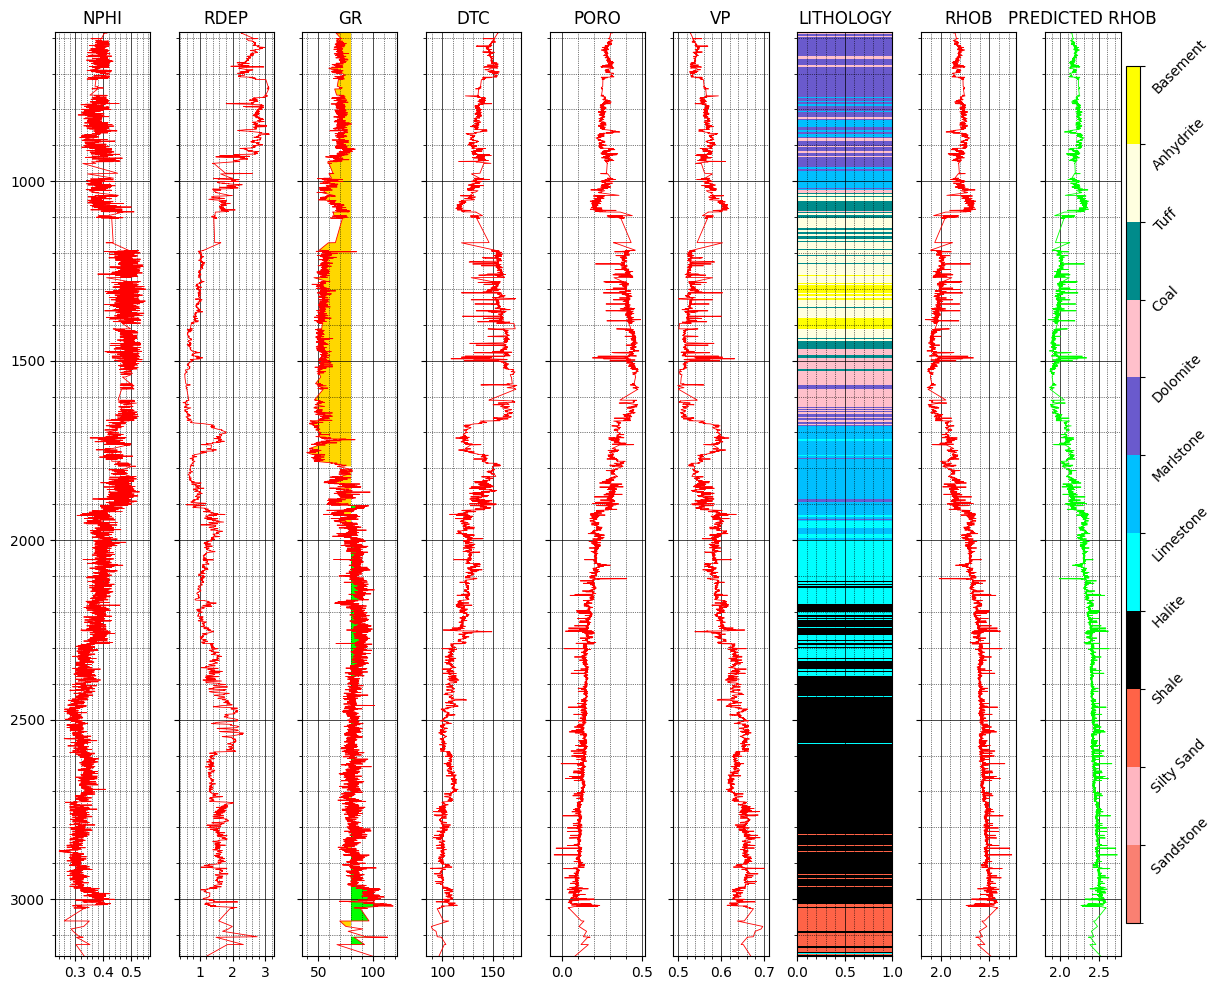

In [34]:
import matplotlib.colors as mcolors
y_pred = model.predict(X_test)
print(y_pred)
mnemonics = list(data.columns)
data = data.values
print(mnemonics)
rows, cols = 1, 9
fig,ax = plt.subplots(nrows = rows, ncols=cols, figsize=(14,12), sharey=True)


cmap = mcolors.ListedColormap(list(color_map.values()))
norm = mcolors.BoundaryNorm(list(range(len(color_map) + 1)), cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ticks=list(reversed(range(len(color_map)))), aspect=60, pad=0.05, extend='neither', orientation='vertical')
cbar.ax.set_yticklabels([lithology_labels[key] for key in color_map.keys()], rotation=45, va='center')
cbar.ax.invert_yaxis() 

for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1],data[:,0],'r', linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].set_title('%s' %mnemonics[i+1])
    
    if i == cols - 3:
        F = np.vstack((data[:, -1], data[:, -1])).T
        m = ax[i].imshow(F, aspect='auto', cmap=cmap, extent=[0, 1, max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mnemonics[i + 1])

    elif i==cols-1:
        ax[i].plot(y_pred, data[:,0],'lime', linewidth=0.6)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='black')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        ax[i].set_ylim(max(data[:, 0]), min(data[:, 0]))
        ax[i].set_title('PREDICTED RHOB')



cl = 80
y2 = data[:,3]
y1 = y2*0+cl
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0.3)

plt.show()